In [2]:
include("src/plottingUtils.jl")
include("src/parallelCGA.jl")

PCGA (generic function with 3 methods)

In [3]:
B1 = [Point(0,0),Point(1.5,3.6),Point(3,0)]

3-element Array{Point,1}:
 Point(0, 0)
 Point(1.5, 3.6)
 Point(3, 0)

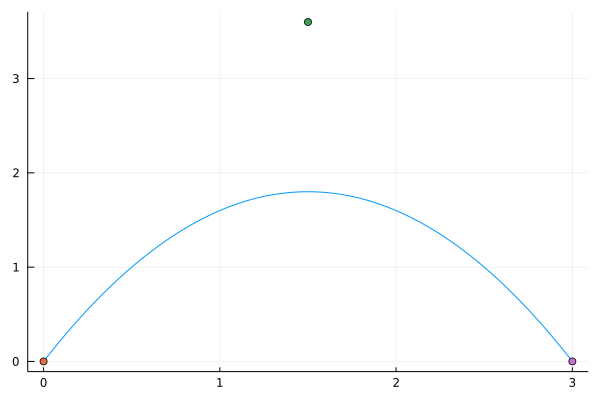

In [4]:
plt = plot_curve(B1,100)
plot_control_points!(plt,B1)
plt

In [5]:
B2 = [Point(0,3),Point(1.5,-2),Point(3,3)]

3-element Array{Point,1}:
 Point(0, 3)
 Point(1.5, -2)
 Point(3, 3)

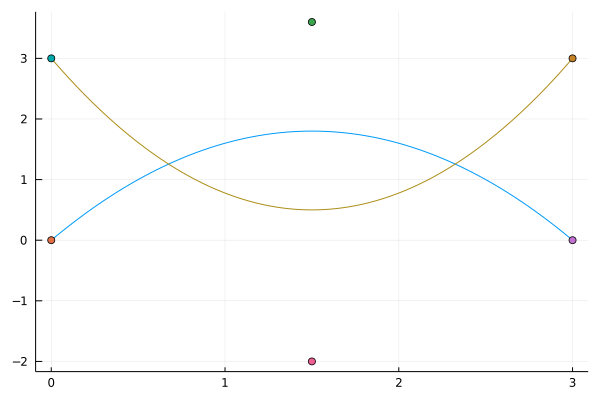

In [6]:
plot_curve!(plt,2,B2,100)
plot_control_points!(plt,B2)
plt

In [121]:
include("src/bezier.jl")

bezInt (generic function with 2 methods)

In [112]:
ENV["JULIA_DEBUG"] = nothing

In [122]:
foo = bezInt(B1,B2)

(true, (Point[Point(0, 0), Point(0.375, 0.9), Point(0.75, 1.35)], Point[Point(0.75, 1.125), Point(0.5625, 1.4375), Point(0.375, 1.90625)]))

In [89]:
foo

(false, (Point[], Point[]))

In [36]:
ts = rand(0:0.05:1,10)

10-element Array{Float64,1}:
 0.8
 0.35
 0.5
 0.35
 1.0
 0.55
 0.95
 0.55
 0.3
 0.7

In [37]:
    toLuxPoints = b -> map(p-> Luxor.Point(p[1],p[2]),b)


#602 (generic function with 1 method)

In [45]:
B1_points = map(t -> B1(t), ts)|> toRealArray |> toLuxPoints

10-element Array{Luxor.Point,1}:
 Luxor.Point(2.4000000000000004, 1.152)
 Luxor.Point(1.0499999999999998, 1.6380000000000001)
 Luxor.Point(1.5, 1.8)
 Luxor.Point(1.0499999999999998, 1.6380000000000001)
 Luxor.Point(3.0, 0.0)
 Luxor.Point(1.6500000000000004, 1.782)
 Luxor.Point(2.8499999999999996, 0.3420000000000003)
 Luxor.Point(1.6500000000000004, 1.782)
 Luxor.Point(0.8999999999999998, 1.512)
 Luxor.Point(2.0999999999999996, 1.5120000000000002)

In [47]:
B2_points = map(t -> B2(t), ts)|> toRealArray |> toLuxPoints

10-element Array{Luxor.Point,1}:
 Luxor.Point(2.4000000000000004, 1.4000000000000006)
 Luxor.Point(1.0499999999999998, 0.7250000000000001)
 Luxor.Point(1.5, 0.5)
 Luxor.Point(1.0499999999999998, 0.7250000000000001)
 Luxor.Point(3.0, 3.0)
 Luxor.Point(1.6500000000000004, 0.525)
 Luxor.Point(2.8499999999999996, 2.5249999999999995)
 Luxor.Point(1.6500000000000004, 0.525)
 Luxor.Point(0.8999999999999998, 0.8999999999999996)
 Luxor.Point(2.0999999999999996, 0.8999999999999997)

In [48]:
            hull_intersection = length(filter(each -> each == 1,

                         [Luxor.isinside(p, B1 |> toRealArray |> convex_hull |> toLuxPoints) for p in B2_points |> toRealArray |> convex_hull |> toLuxPoints] ∪
                                          [Luxor.isinside(p, B2 |> toRealArray |> convex_hull |> toLuxPoints) for p in B1_points|> toRealArray |> convex_hull  |> toLuxPoints])) != 0


true

In [56]:
toLuxPoints = b -> map(p-> Luxor.Point(p[1],p[2]),b)
hull_intersection = length(filter(each -> each == 1,
             [Luxor.isinside(p, B1 |> toRealArray |> convex_hull |> toLuxPoints) for p in B2 |> toRealArray |> convex_hull |> toLuxPoints] ∪
                              [Luxor.isinside(p, B2 |> toRealArray |> convex_hull |> toLuxPoints) for p in B1|> toRealArray |> convex_hull  |> toLuxPoints])) != 0


true

In [51]:
[Luxor.isinside(p, B1 |> toRealArray |> convex_hull |> toLuxPoints) for p in B2 |> toRealArray |> convex_hull |> toLuxPoints] ∪
                              [Luxor.isinside(p, B2 |> toRealArray |> convex_hull |> toLuxPoints) for p in B1|> toRealArray |> convex_hull  |> toLuxPoints]

2-element Array{Bool,1}:
 0
 1

In [48]:
[Luxor.isinside(p, B2 |> toRealArray |> convex_hull |> toLuxPoints) for p in B1|> toRealArray |> convex_hull  |> toLuxPoints]

3-element Array{Bool,1}:
 0
 1
 0

In [45]:
B1 |> toRealArray |> convex_hull 

3-element Array{Array{Float64,1},1}:
 [3.0, 0.0]
 [1.5, 2.6]
 [0.0, 0.0]

In [46]:
B2 |> toRealArray |> convex_hull 

3-element Array{Array{Float64,1},1}:
 [0.0, 3.0]
 [1.5, -2.0]
 [3.0, 3.0]

In [44]:
[Luxor.isinside(p, B1 |> toRealArray |> convex_hull |> toLuxPoints) for p in B2 |> toRealArray |> convex_hull |> toLuxPoints]

3-element Array{Bool,1}:
 0
 0
 0